In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

In [4]:
from wordcloud import WordCloud

In [5]:
athletes = pd.read_csv('athlete_events.csv')

In [6]:
noc = pd.read_csv('noc_regions.csv')

In [7]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [5]:
pysqldf('select * from athletes limit 10 ')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [6]:
pysqldf('select Team, NOC from athletes GROUP BY Team, NOC ')

,Team,NOC
0,30. Februar,AUT
1,A North American Team,MEX
2,A North American Team,USA
3,Acipactli,MEX
4,Acturus,ARG
...,...,...
1226,Zambia,ZAM
1227,Zefyros,GRE
1228,Zimbabwe,ZIM
1229,Zut,BEL


In [7]:
# To check columns with null values
pysqldf('''select count(*),count(Name),count(Sex),count(Age),count(Height),count(Medal),
        count(Weight),count(Games),count(Year),count(Season),count(City),count(Sport),count(Event),
        count(Team), count(NOC) from athletes''')

,count(*),count(Name),count(Sex),count(Age),count(Height),count(Medal),count(Weight),count(Games),count(Year),count(Season),count(City),count(Sport),count(Event),count(Team),count(NOC)
0,271116,271116,271116,261642,210945,39783,208241,271116,271116,271116,271116,271116,271116,271116,271116


In [8]:
pysqldf('select count(*), count(NOC), count(region), count(notes) from noc')

,count(*),count(NOC),count(region),count(notes)
0,230,230,227,21


In [9]:
# Country with most medals
pysqldf('''select  NOC, count(*) from athletes where Medal is not null
        GROUP by NOC order by count(*) desc limit 10''')

,NOC,count(*)
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


In [5]:
# Athletes with most medals
pysqldf('''select Name, count(*) from athletes where Medal is not null
        GROUP by Name order by count(*) desc limit 10''')

,Name,count(*)
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Takashi Ono,13
4,Ole Einar Bjrndalen,13
5,Edoardo Mangiarotti,13
6,Borys Anfiyanovych Shakhlin,13
7,Sawao Kato,12
8,Ryan Steven Lochte,12
9,Paavo Johannes Nurmi,12


In [6]:
# Event with representation from most countries
pysqldf('''select  Event, Year, count(DISTINCT(NOC)) from athletes 
GROUP by Event, Year order by Year desc , count(DISTINCT(NOC)) desc limit 10''')

,Event,Year,count(DISTINCT(NOC))
0,Athletics Women's Marathon,2016,80
1,Athletics Men's Marathon,2016,79
2,Swimming Women's 50 metres Freestyle,2016,75
3,Swimming Men's 50 metres Freestyle,2016,72
4,"Cycling Men's Road Race, Individual",2016,63
5,Athletics Men's 100 metres,2016,57
6,Athletics Women's 100 metres,2016,56
7,Athletics Women's 200 metres,2016,49
8,Athletics Men's 200 metres,2016,48
9,Gymnastics Women's Balance Beam,2016,47


In [7]:
# Average age, weight and height of athletes with medals
pysqldf('select avg(Age), avg(Height), avg(Weight) from athletes where Medal is not null ')

,avg(Age),avg(Height),avg(Weight)
0,25.925175,177.554197,73.77068


In [8]:
pysqldf('select count(*), count(NOC), count(region), count(notes), count(coalesce(notes,region)) from noc')

,count(*),count(NOC),count(region),count(notes),"count(coalesce(notes,region))"
0,230,230,227,21,230


In [9]:
pysqldf('select * from noc')

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None
...,...,...,...
225,YEM,Yemen,None
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,None


In [ ]:
# getting new region column from existing columns to remove duplicate region names 
the_region_new = list()
for x in noc.index:
    note = noc.loc[x]['notes']
    reg = noc.loc[x]['region']
    if note is None:
        the_region_new.append(reg)
    else:
        the_region_new.append(note)
noc['region_new'] = the_region_new

In [10]:
pysqldf('''select * from noc 
        where notes is not null order by region DESC ''')

,NOC,region,notes
0,YAR,Yemen,North Yemen
1,YMD,Yemen,South Yemen
2,ISV,"Virgin Islands, US",Virgin Islands
3,TTO,Trinidad,Trinidad and Tobago
4,WIF,Trinidad,West Indies Federation
5,UAR,Syria,United Arab Republic
6,SCG,Serbia,Serbia and Montenegro
7,YUG,Serbia,Yugoslavia
8,SKN,Saint Kitts,Turks and Caicos Islands
9,NBO,Malaysia,North Borneo


In [11]:
# getting new region column from existing columns to remove duplicate region names
pysqldf('''select NOC, region, notes, coalesce(notes,region) as region_new from noc 
        where notes is not null order by region DESC ''')

,NOC,region,notes,region_new
0,YAR,Yemen,North Yemen,North Yemen
1,YMD,Yemen,South Yemen,South Yemen
2,ISV,"Virgin Islands, US",Virgin Islands,Virgin Islands
3,TTO,Trinidad,Trinidad and Tobago,Trinidad and Tobago
4,WIF,Trinidad,West Indies Federation,West Indies Federation
5,UAR,Syria,United Arab Republic,United Arab Republic
6,SCG,Serbia,Serbia and Montenegro,Serbia and Montenegro
7,YUG,Serbia,Yugoslavia,Yugoslavia
8,SKN,Saint Kitts,Turks and Caicos Islands,Turks and Caicos Islands
9,NBO,Malaysia,North Borneo,North Borneo


In [12]:
# creating country_table:

country_year = pysqldf('''
    select at.NOC, noc.region, noc.Notes, at.Sport, at.Event, at.Medal, count(at.Medal) as Medal_count, at.Year 
    from athletes at inner join noc on at.NOC = noc.NOC 
    where at.Medal is not null 
    group by at.NOC, noc.region, noc.Notes, at.Sport, at.Event, at.Medal, at.Year''')

country_tot = pysqldf('''
    select at.NOC, noc.region, noc.Notes, at.Sport, at.Event, at.Medal, count(at.Medal) as Medal_count 
    from athletes at inner join noc on at.NOC = noc.NOC 
    where at.Medal is not null 
    group by at.NOC, noc.region, noc.Notes, at.Sport, at.Event, at.Medal''')

country_med = pysqldf('''
    select at.NOC, noc.region, noc.Notes, at.Medal, count(at.Medal) as Medal_count 
    from athletes at inner join noc on at.NOC = noc.NOC 
    where at.Medal is not null 
    group by at.NOC, noc.region, noc.Notes, at.Medal''')



In [13]:
print('Region with most Gold Medals')
display(pysqldf('''select coalesce(notes,region) as Region, Medal_count
                from country_med
                where Medal = "Gold"
                order by Medal_count Desc''').head(10))
print('Region with most Silver Medals')
display(pysqldf('''select coalesce(notes,region) as Region, Medal_count
                from country_med
                where Medal = "Silver"
                order by Medal_count Desc''').head(10))
print('Region with most Bronze Medals')
display(pysqldf('''select coalesce(notes,region) as Region, Medal_count
                from country_med
                where Medal = "Bronze"
                order by Medal_count Desc''').head(10))



Region with most Gold Medals


,Region,Medal_count
0,USA,2638
1,Russia,1082
2,Germany,745
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Germany,397


Region with most Silver Medals


,Region,Medal_count
0,USA,1641
1,UK,739
2,Russia,732
3,Germany,674
4,France,610
5,Italy,531
6,Sweden,522
7,Australia,455
8,Canada,438
9,Russia,367


Region with most Bronze Medals


,Region,Medal_count
0,USA,1358
1,Germany,746
2,Russia,689
3,France,666
4,UK,651
5,Sweden,535
6,Italy,531
7,Australia,517
8,Canada,451
9,Finland,432


In [8]:
# creating participation to win conversion analysis tables: 
ath_perf = pysqldf('''
    select at.Name, at.NOC, coalesce(noc.region, noc.Notes) as Region, at.Year,
    case
        when at.Medal is null then 0 else 1 end as win_status
    from athletes at inner join noc on at.NOC = noc.NOC ''')

Region_binary = pysqldf('''
    select Region, 
    count(Name) as participations,
    count(case 
        when win_status = 1 then Name else null end) as win,
    count(case 
        when win_status = 0 then Name else null end) as loss
    from ath_perf 
    group by Region order by Region''')

Region_perf = pysqldf('''
    select Region, participations, win, loss, 
    cast((win*100/participations) as float) as win_perc 
    from Region_binary''')

In [9]:
ath = pysqldf('''
    select Region from ath_perf where win_status = 1''')

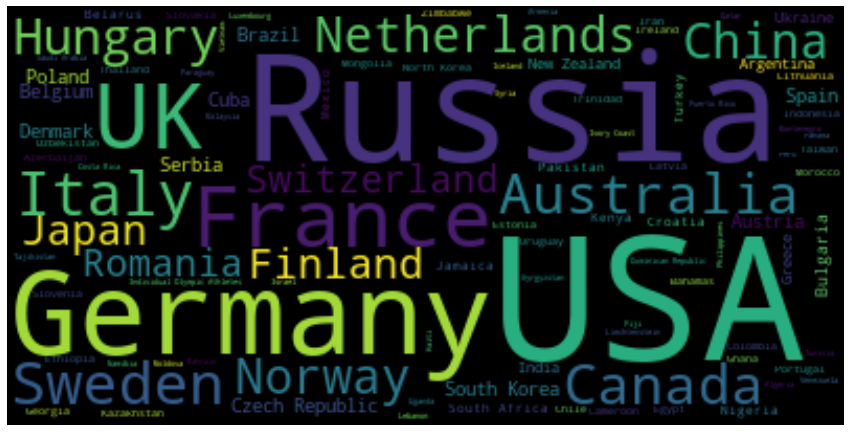

In [23]:
reg = list()
for r in ath.Region:
    reg.append(r)
wordDict = Counter(reg)
wordcloud = WordCloud().generate_from_frequencies(wordDict)
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [15]:
print('Region with most participations')
display(pysqldf('''select Region, participations from Region_perf
                    order by participations desc''').head(10))
print('Region with most participation to win conversion')
display(pysqldf('''select * from Region_perf
                    order by win_perc desc''').head(10))


Region with most participations


,Region,participations
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692
5,Italy,10715
6,Canada,9734
7,Japan,8444
8,Sweden,8339
9,Australia,7724


Region with most participation to win conversion


,Region,participations,win,loss,win_perc
0,Russia,11692,3947,7745,33.0
1,USA,18853,5637,13216,29.0
2,Germany,15883,3756,12127,23.0
3,Pakistan,562,121,441,21.0
4,Norway,4960,1033,3927,20.0
5,Jamaica,848,157,691,18.0
6,Sweden,8339,1536,6803,18.0
7,Australia,7724,1349,6375,17.0
8,China,5826,993,4833,17.0
9,Croatia,876,149,727,17.0


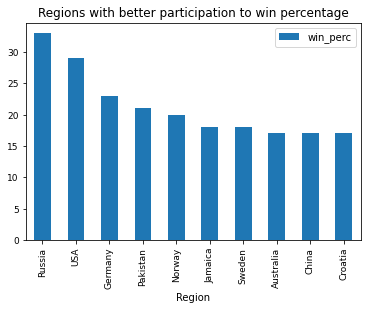

In [19]:
pysqldf('''select * from Region_perf
                    order by win_perc desc''').head(10).plot.bar(x = 'Region', y = 'win_perc', fontsize='9', title = 'Regions with better participation to win percentage')

In [12]:
city = pysqldf('''select Region, city, count(city) as Medals from 
    (select coalesce(noc.region, noc.Notes) as Region, at.city, at.Medal
    from athletes at inner join noc on at.NOC = noc.NOC  where at.Medal is not null)
    group by Region, city''')

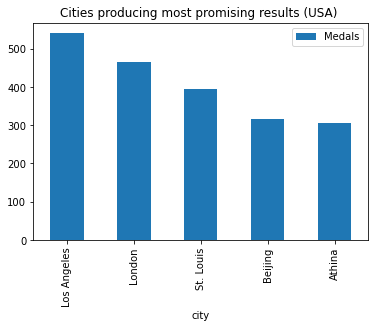

In [14]:
pysqldf('select city, Medals from city where Region = "USA" order by Medals desc').head(5).plot.bar(x = 'city', y = 'Medals', title = 'Cities producing most promising results (USA) ')

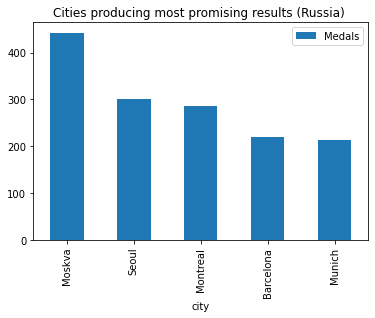

In [17]:
pysqldf('select city, Medals from city where Region = "Russia" order by Medals desc').head(5).plot.bar(x = 'city', y = 'Medals', title = 'Cities producing most promising results (Russia) ')

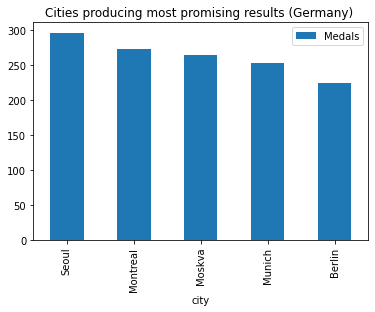

In [18]:
pysqldf('select city, Medals from city where Region = "Germany" order by Medals desc').head(5).plot.bar(x = 'city', y = 'Medals', title = 'Cities producing most promising results (Germany) ')

In [20]:
# creating sports and events growth in numbers analysis tables: 

sports = pysqldf('''
    select Period, count(Period) as Sprts_add,
    sum(count(Period)) over (ORDER BY Period ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as cumm_sprts 
    from 
        (select Sport, min(Year), 
        case 
            when min(Year) <=1920 then 1920
            when min(Year) >1920 and min(Year) <=1940 then 1940
            when min(Year) >1940 and min(Year) <=1960 then 1960
            when min(Year) >1960 and min(Year) <=1980 then 1980
            when min(Year) >1980 and min(Year) <=2000 then 2000
            when min(Year) >2000 then 2020
            end as Period
        from athletes group by Sport)
    group by Period''')

events = pysqldf('''
    select Period, count(Period) as evnts_add,
    sum(count(Period)) over (ORDER BY Period ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as cumm_evnts
    from
        (select Event, min(Year),
        case 
            when min(Year) <=1920 then 1920
            when min(Year) >1920 and min(Year) <=1940 then 1940
            when min(Year) >1940 and min(Year) <=1960 then 1960
            when min(Year) >1960 and min(Year) <=1980 then 1980
            when min(Year) >1980 and min(Year) <=2000 then 2000
            when min(Year) >2000 then 2020
            end as Period
        from athletes group by Event)
    group by Period''')

gender = pysqldf('''
    select Period, Participants, M, F, cast((F*100/Participants) as float) as Fem_perc
    from
        (select Period, count(*) as Participants, count(case when Sex = "M" then "M" else null end) as M,
        count(case when Sex = "F" then "F" else null end) as F
        from
            (select Name, Sex, Year,  
            case 
                when Year <=1920 then 1920
                when Year >1920 and Year <=1940 then 1940
                when Year >1940 and Year <=1960 then 1960
                when Year >1960 and Year <=1980 then 1980
                when Year >1980 and Year <=2000 then 2000
                when Year >2000 then 2020
                end as Period
            from athletes )
        group by Period)''')



In [17]:
print('Olympics New Sports Induction with time')
display(sports)

print('Olympics New Events Induction with time')
display(events)

print('Olympics Gender participation distribution with time')
display(gender)

Olympics New Sports Induction with time


,Period,Sprts_add,cumm_sprts
0,1920,34,34
1,1940,14,48
2,1960,1,49
3,1980,3,52
4,2000,13,65
5,2020,1,66


Olympics New Events Induction with time


,Period,evnts_add,cumm_evnts
0,1920,342,342
1,1940,79,421
2,1960,51,472
3,1980,79,551
4,2000,140,691
5,2020,74,765


Olympics Gender participation distribution with time


,Period,Participants,M,F,Fem_perc
0,1920,16783,16455,328,1.0
1,1940,21989,20373,1616,7.0
2,1960,32507,27195,5312,16.0
3,1980,51357,40012,11345,22.0
4,2000,77043,51731,25312,32.0
5,2020,71437,40828,30609,42.0


Text(0.5, 1.0, 'No of sports played by year ')

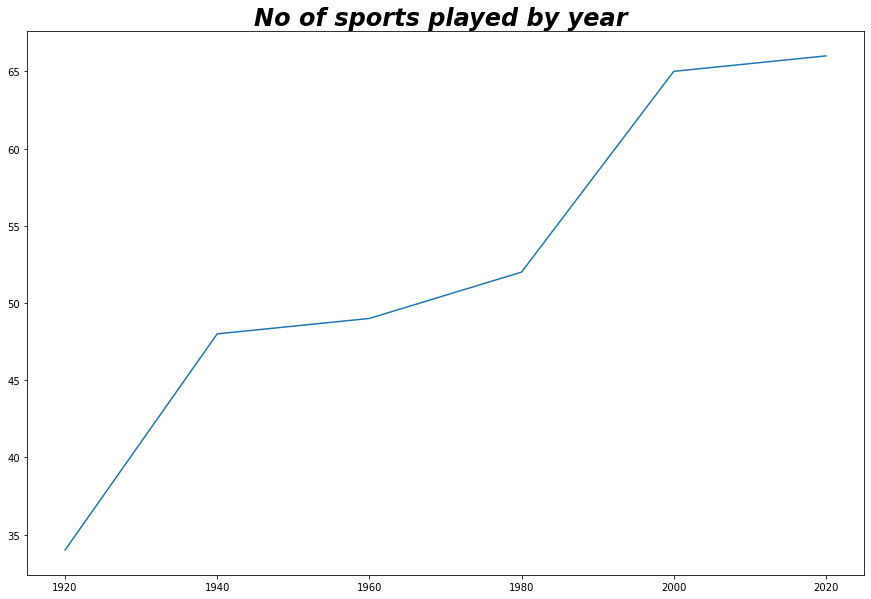

In [34]:
plt.figure(figsize=(15,10))
plt.plot(sports.Period, sports.cumm_sprts)
plt.title("No of sports played by year ", fontname='DejaVu Sans', fontsize = 24, fontstyle='italic', fontweight='bold')

Text(0.5, 1.0, 'No of events played by year ')

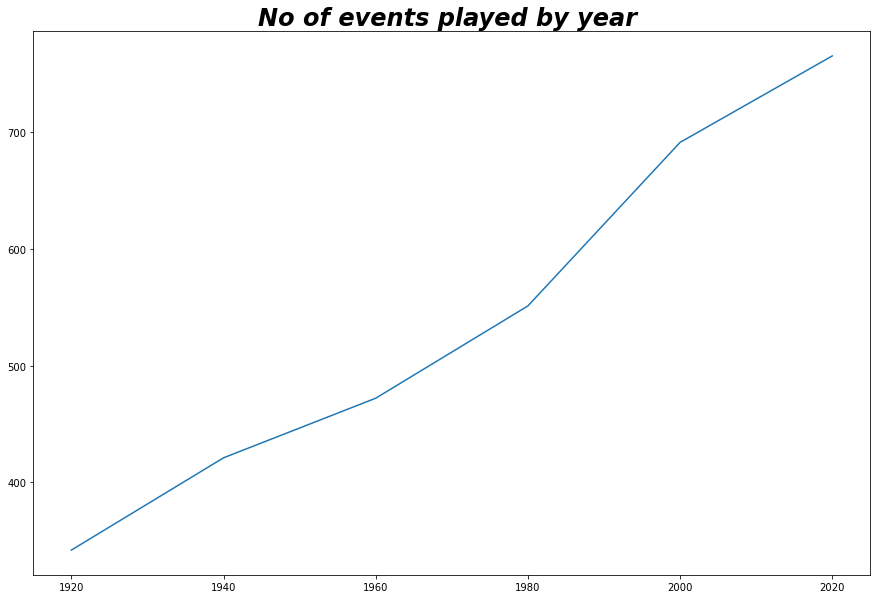

In [33]:
plt.figure(figsize=(15,10))
plt.plot(events.Period, events.cumm_evnts)
plt.title("No of events played by year ", fontname='DejaVu Sans', fontsize = 24, fontstyle='italic', fontweight='bold')

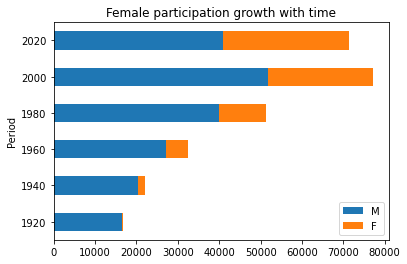

In [44]:
gender.plot(x="Period", y=["M", "F"], kind="barh", stacked=True, title = 'Female participation growth with time',)

In [35]:
# creating a matrix to identify reason of more female participation:

fem_evnts_growth = pysqldf('''
    select Period, count(Period) as f_evnts_add,
    sum(count(Period)) over (ORDER BY Period ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as cumm_f_evnts
    from
        (select Event, Period from (
            select Event, min(Year),
            case 
                when min(Year) <=1920 then 1920
                when min(Year) >1920 and min(Year) <=1940 then 1940
                when min(Year) >1940 and min(Year) <=1960 then 1960
                when min(Year) >1960 and min(Year) <=1980 then 1980
                when min(Year) >1980 and min(Year) <=2000 then 2000
                when min(Year) >2000 then 2020
            end as Period
            from athletes group by Event)
        where Event like "%Women%")
    group by Period''')

fem_part = pysqldf('''
    select Period, Fem_perc, evnts_growth, fem_evnts_growth, 
    cast((fem_evnts_growth*100/evnts_growth) as float) as growth_per
    from
        (select g.Period, g.Fem_perc, ev.cumm_evnts as evnts_growth, 
        f.cumm_f_evnts as fem_evnts_growth from gender g
        inner join events ev on g.Period = ev.Period 
        inner join fem_evnts_growth f on g.Period = f.Period)''')

In [23]:
print('Olympics Female participantion growth reason')
display(fem_part)



Olympics Female participantion growth reason


,Period,Fem_perc,evnts_growth,fem_evnts_growth,growth_per
0,1920,1.0,342,13,3.0
1,1940,7.0,421,27,6.0
2,1960,16.0,472,50,10.0
3,1980,22.0,551,77,13.0
4,2000,32.0,691,169,24.0
5,2020,42.0,765,211,27.0


Text(0.5, 1.0, 'Women centric events percentage by year ')

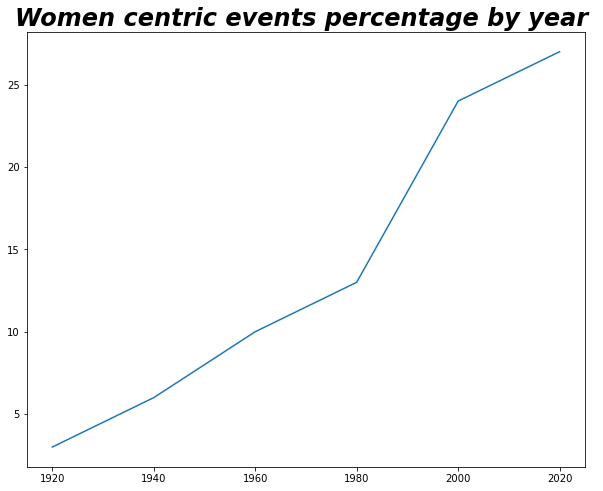

In [52]:
plt.figure(figsize=(10,8))
plt.plot(fem_part.Period, fem_part.growth_per)
plt.title("Women centric events percentage by year ", fontname='DejaVu Sans', fontsize = 24, fontstyle='italic', fontweight='bold')

Text(0.5, 1.0, 'Women participation percentage by year ')

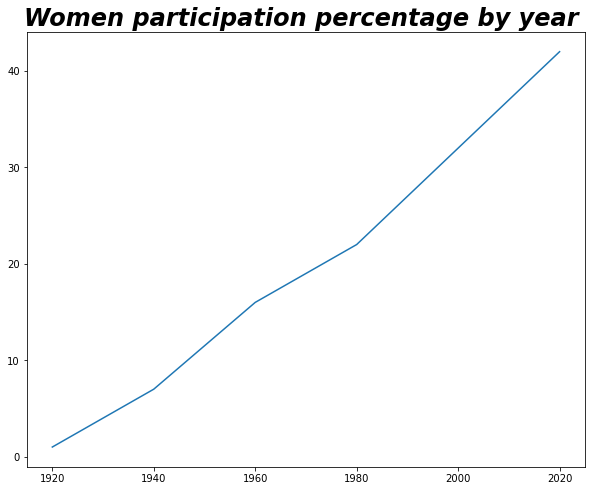

In [53]:
plt.figure(figsize=(10,8))
plt.plot(fem_part.Period, fem_part.Fem_perc)
plt.title("Women participation percentage by year ", fontname='DejaVu Sans', fontsize = 24, fontstyle='italic', fontweight='bold')

In [ ]:
stats = pysqldf('''select Sport, city, count(city) as Medals from 
    (select coalesce(noc.region, noc.Notes) as Region, at.city, at.Medal
    from athletes at inner join noc on at.NOC = noc.NOC  where at.Medal is not null)
    group by Region, city''')